#### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Merge the 12 months of sales data into a single CSV file

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index = False)

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows of NAN 

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert Columns to the correct type

In [6]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')

#### Augment Data with additional columns

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.sort_values(by = 'Sales', ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
127265,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.00
92026,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00
4717,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00
5219,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00
174998,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",10,1999.98
...,...,...,...,...,...,...,...,...
161398,265671,AAA Batteries (4-pack),1,2.99,10/15/19 21:15,"166 Meadow St, Atlanta, GA 30301",10,2.99
61684,156382,AAA Batteries (4-pack),1,2.99,02/21/19 20:00,"944 Jackson St, Los Angeles, CA 90001",2,2.99
61687,156385,AAA Batteries (4-pack),1,2.99,02/02/19 22:33,"961 6th St, Los Angeles, CA 90001",2,2.99
61689,156387,AAA Batteries (4-pack),1,2.99,02/16/19 16:17,"950 Pine St, Dallas, TX 75001",2,2.99


#### What was the best month for sales? How much was earned that month?

In [9]:
Highest_Sales = all_data.groupby('Month').sum()
Highest_Sales.sort_values(by = 'Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


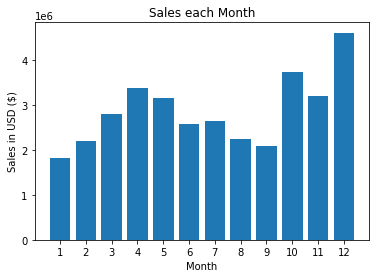

In [10]:
months = range(1,13)

plt.bar(months, Highest_Sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Sales each Month')
plt.show()

#### What city had the highest number of sales

In [11]:
#all_data[['Street Address', 'City', 'Zip Code']] = all_data['Purchase Address'].str.split(',', expand = True)
#all_data.head()

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [13]:
City_Sales = all_data.groupby('City').sum()
City_Sales.sort_values(by = 'Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


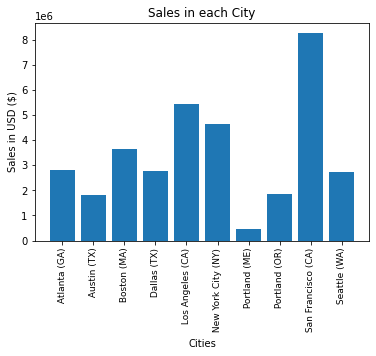

In [14]:
Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities, City_Sales['Sales'])
plt.xticks(Cities, rotation ='vertical', size=9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.title('Sales in each City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


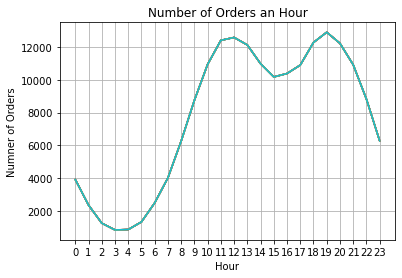

In [17]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Numner of Orders')
plt.title('Number of Orders an Hour')
plt.grid()
plt.show()

#### Question 4 What products are sold together?

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df= df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

<ipython-input-18-a88b12e656f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5 What product sold the most? Why do you think it sokd the most?

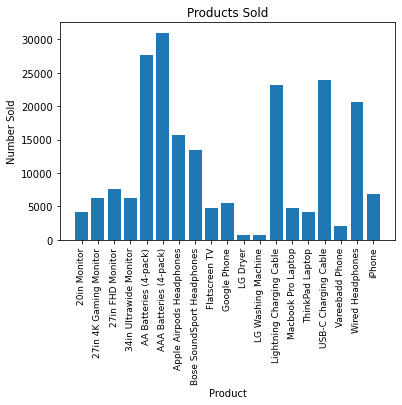

In [20]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size=9)
plt.ylabel('Number Sold')
plt.xlabel('Product')
plt.title('Products Sold');

<ipython-input-21-64198ba9a877>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation ='vertical', size=9)


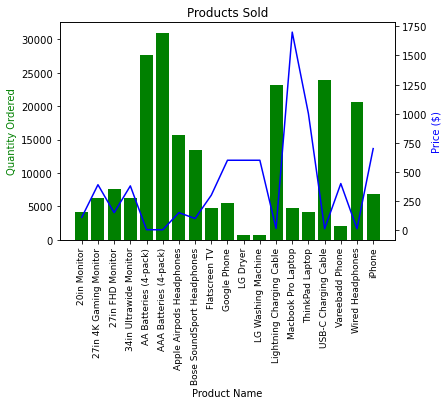

In [21]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation ='vertical', size=9)
plt.title('Products Sold');